### 유방암 데이터

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# 유방암 여부 (0,1) - 이진분류 문제
# 유방암 데이터 불러오기
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# X, y (특성, 라벨) 분리
# 7:3,
X_train, X_test, y_train, y_test = train_test_split(data['data'],
                                                    data['target'],
                                                    test_size=0.3,
                                                    random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

##### 모델링
- 랜덤포레스트 이용(앙상블)

In [11]:
# 모델 생성
# n_estimators : 만들어줄 트리의 갯수
# max_features : 특성의 최대 갯수 (비율)
# 결정트리 파라미터 이용 가능
forest = RandomForestClassifier(n_estimators=100,
                       max_features=0.5,
                       random_state=0)

In [12]:
# 모델 학습
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, random_state=0)

In [13]:
# 모델 평가
print('훈련세트 정확도 : {}'.format(forest.score(X_train,y_train)))
print('테스트세트 정확도 : {}'.format(forest.score(X_test,y_test)))

훈련세트 정확도 : 1.0
테스트세트 정확도 : 0.9707602339181286


In [14]:
# 모델 예측
forest.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [15]:
# 예측 확률값 확인
forest.predict_proba(X_test[0:5])

array([[0.96, 0.04],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.16, 0.84],
       [0.  , 1.  ]])

In [16]:
# 모델 생성2
forest1 = RandomForestClassifier(n_estimators=100,
                       random_state=0,
                       max_depth=5,
                       max_leaf_nodes=12)

In [17]:
forest1.fit(X_train, y_train)
forest1.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [18]:
forest1.predict_proba(X_test[0:5])

array([[0.95650996, 0.04349004],
       [0.03768149, 0.96231851],
       [0.00783281, 0.99216719],
       [0.11690329, 0.88309671],
       [0.02009945, 0.97990055]])

In [19]:
# 랜덤포레스트 모델의 특성 중요도 확인
forest.feature_importances_

array([0.00389379, 0.01697506, 0.00366452, 0.0047667 , 0.00260919,
       0.00330658, 0.01276831, 0.2431275 , 0.00385659, 0.00197553,
       0.00760335, 0.00287916, 0.00529244, 0.02417259, 0.00270792,
       0.00406423, 0.00323979, 0.00251459, 0.00483912, 0.00443312,
       0.06226393, 0.01977252, 0.22282204, 0.06804949, 0.00424443,
       0.01179811, 0.01542211, 0.2259215 , 0.00605585, 0.00495993])

In [20]:
len(forest.feature_importances_)

30

In [21]:
# 특성 중요도 시각화 하기
def plot_feature_importance(model):
    # 특성 갯수
    n_features = len(model.feature_importances_)
    # 시각화
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_)  # 수평 bar 차트
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.yticks(range(n_features), data.feature_names) # yticks에 특성 이름
    plt.show()

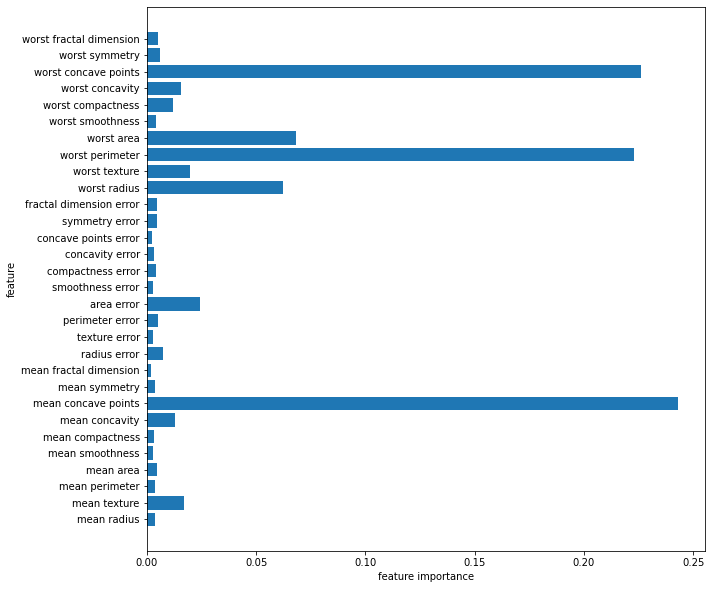

In [22]:
plot_feature_importance(forest)

##### 부스팅 모델
- Grandient Boosting
- xgboost
- lightGBM

In [25]:
gb_model = GradientBoostingClassifier(n_estimators=100,
                           max_depth=5,
                           learning_rate=0.01)
                            # 학습율, 오차를 얼마나 반영할지

In [26]:
gb_model.fit(X_train, y_train)
gb_model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

##### grid search - 하이퍼파라미터 튜닝
- 하이퍼파라미터를 여러개 조정하여 모델 학습을 진행 할 경우 사용하는 방법

In [27]:
from sklearn.model_selection import GridSearchCV

In [33]:
# 딕셔너리{key값:value값} - 확인하고 싶은 파라미터 값
params = {
    'n_estimators' : [500, 1000, 1500, 2000],
    'max_depth' : [3, 5, 7, 8],
    'max_features' : [0.3, 0.5, 0.7],
    'min_samples_leaf' : [10, 20, 30]
}

In [34]:
grid = GridSearchCV(forest, params, cv=3,)

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features=0.5, random_state=0),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'max_features': [0.3, 0.5, 0.7],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [500, 1000, 1500, 2000]})

In [36]:
# 가장 좋은 조합
grid.best_params_

{'max_depth': 3,
 'max_features': 0.5,
 'min_samples_leaf': 20,
 'n_estimators': 500}

In [37]:
# 가장 좋은 조합의 점수
grid.best_score_

0.942222981696666

In [38]:
# 가장 좋은 조합의 모델
best_model = grid.best_estimator_

In [39]:
best_model

RandomForestClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                       n_estimators=500, random_state=0)